<center><h1>Investment styles and the CAPM</h1></center

<center>William Mann</center>

<center>
<img src="https://wgjm1986.github.io/Investments/Emory_small.png" height="200px" width="300px" />
</center>

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import wrds
import math
import numpy
import statsmodels.formula.api as sm
import wget, shutil
import os

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16.0, 8.0]

conn = wrds.Connection(wrds_username='wmann')
FF3F = conn.get_table(library='ff_all',table='factors_monthly')
FF3F['month'] = pd.to_datetime(FF3F['date']).dt.to_period('M')
FF3F = FF3F.drop(['date','dateff','year','umd'],axis=1).set_index('month')
FF3F = FF3F['1926':'2023']
FF3F = FF3F.astype('float64')

def standard_figure(data,title):
    fig,ax = plt.subplots()
    betas = [ sm.ols("d"+str(i)+"~mktrf",data=data).fit().params[1] for i in range(1,11) ]
    avgs = [ 12*100*data["d"+str(i)].mean() for i in range(1,11)]
    plt.scatter([0,1],[0,12*100*data['mktrf'].mean()])
    plt.axline(xy1=[0,0],xy2=[1,12*100*data['mktrf'].mean()])
    plt.scatter(betas,avgs)
    plt.text(0,0,"   Risk-free",horizontalalignment="left",verticalalignment="center")
    plt.text(1,12*100*data['mktrf'].mean(),"   Market",horizontalalignment="left",verticalalignment="center")
    for i in range(1,11):
        plt.text(betas[i-1],avgs[i-1]+0.5,str(i),horizontalalignment="center",verticalalignment="bottom")
    plt.xticks([0,0.5,1,1.5,2])
    plt.yticks([-5,0,5,10,15,20])
    plt.xlabel("Beta")
    plt.ylabel("Average monthly return (percent, annualized)")
    return fig

Loading library list...
Done


## Portfolios formed on size, 1926-2023

In [2]:
%%capture

# Download Ken French's historical data on 10 portfolios formed on market capitalization ("size")
try: os.remove('Portfolios_Formed_on_ME_CSV.zip')
except OSError: pass
try: os.remove('Portfolios_Formed_on_ME.CSV')
except OSError: pass
wget.download('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_ME_CSV.zip','Portfolios_Formed_on_ME_CSV.zip')
shutil.unpack_archive('Portfolios_Formed_on_ME_CSV.zip')

# Read the data from the CSV file
size_portfolios = pd.read_csv('Portfolios_Formed_on_ME.CSV',skiprows=12,nrows=1175)
size_portfolios.columns = ['dateff','negative','l030','med40','hi30','q1','q2','q3','q4','q5','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10']
size_portfolios['month'] = pd.to_datetime(size_portfolios['dateff'],format="%Y%m",exact=True).dt.to_period('M')
size_portfolios = size_portfolios[['month','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10']].set_index('month')
size_portfolios = size_portfolios/100
size_portfolios = size_portfolios.loc['1926':'2023']

# Calculate average excess returns and betas, and build the figure
size_portfolios_excess = {"d"+str(i): size_portfolios["d"+str(i)] - FF3F['rf'] for i in range(1,11)}
size_portfolios_excess['mktrf'] = FF3F['mktrf']
size_figure = standard_figure(size_portfolios_excess,'size_portfolios')

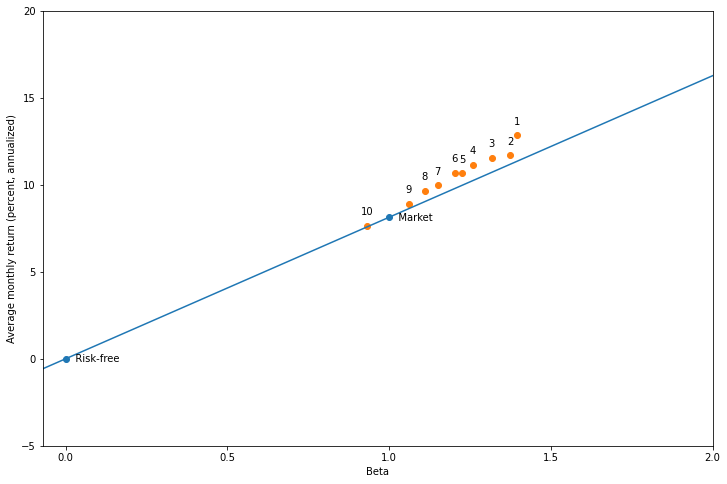

In [3]:
size_figure

## Portfolios formed on value, 1926-2023

In [4]:
%%capture

# Download Ken French's historical data on 10 portfolios formed on book-to-market ratio ("value")
try: os.remove('Portfolios_Formed_on_BE-ME_CSV.zip')
except OSError: pass
try: os.remove('Portfolios_Formed_on_BE-ME.CSV')
except OSError: pass
wget.download('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_BE-ME_CSV.zip','Portfolios_Formed_on_BE-ME_CSV.zip')
shutil.unpack_archive('Portfolios_Formed_on_BE-ME_CSV.zip')

# Read the data from the CSV file
value_portfolios = pd.read_csv('Portfolios_Formed_on_BE-ME.CSV',skiprows=23,nrows=1175)
value_portfolios.columns = ['dateff','negative','l030','med40','hi30','q1','q2','q3','q4','q5','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10']
value_portfolios['month'] = pd.to_datetime(value_portfolios['dateff'],format="%Y%m",exact=True).dt.to_period('M')
value_portfolios = value_portfolios[['month','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10']].set_index('month')
value_portfolios = value_portfolios/100
value_portfolios = value_portfolios.loc['1926':'2023']

# Uncomment the next block to save the data to an Excel spreadsheet for in-class example.

# try: os.remove("Value portfolios.xslx")
# except OSError: pass

# # set up custom ExcelWriter engine to get the date format correct in the output file
# writer = pd.ExcelWriter('Value portfolios.xlsx', engine='xlsxwriter', datetime_format= "yyyy-mm")

# portfolios.to_excel(writer,sheet_name='Portfolio returns',index_label='Month',
#                    columns=['d' + str(i) for i in range(1,11)],
#                    header=['Portfolio 1: Stocks with lowest B/M ratios (growth stocks)']
#                            +['Portfolio '+str(i) for i in range(2,10)]
#                            +['Portfolio 10: Stocks with highest B/M ratios (value stocks)'])

# FF3F.to_excel(writer,sheet_name='Risk-free and market excess',index_label='Month',
#                   columns=['mktrf','rf'],
#                   header=['Fama-French market excess return','Fama-French risk-free return'])

# writer.close()

value_portfolios_excess = {"d"+str(i): value_portfolios["d"+str(i)] - FF3F['rf'] for i in range(1,11)}
value_portfolios_excess['mktrf'] = FF3F['mktrf']
value_portfolios_figure = standard_figure(value_portfolios_excess,'value_portfolios')

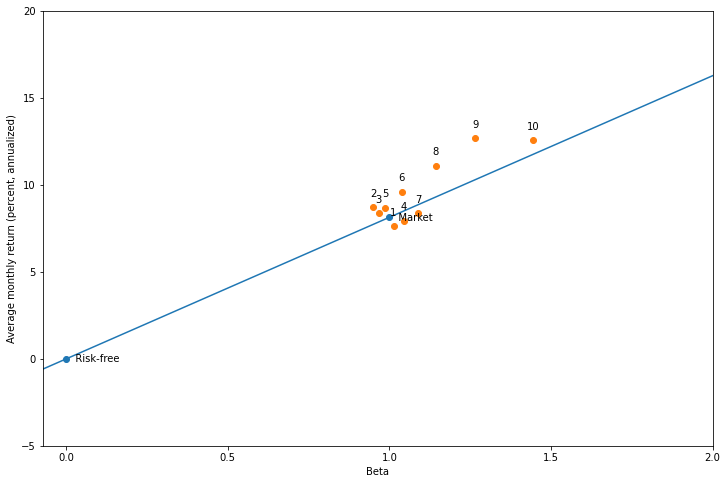

In [5]:
value_portfolios_figure

## Notes on the historical evidence

- In these figures, size and value strategies seem to offer returns
that are roughly fair according to the CAPM. This evidence
would not encourage us to depart from a passive strategy.

- However, the early part of this sample includes the Great
Depression and the second world war. Many researchers omit
these times, and start the analysis in the 1950s.

- It’s not clear whether this is theoretically ideal or not.
In the next figures, we look at how this changes things.

## Portfolios formed on size, 1950-2023

In [6]:
%%capture
size_portfolios_excess_1950 = { key: portfolio['1950':] for key,portfolio in size_portfolios_excess.items() }
size_portfolios_figure_since_1950 = standard_figure(size_portfolios_excess_1950,'size_portfolios_1950')

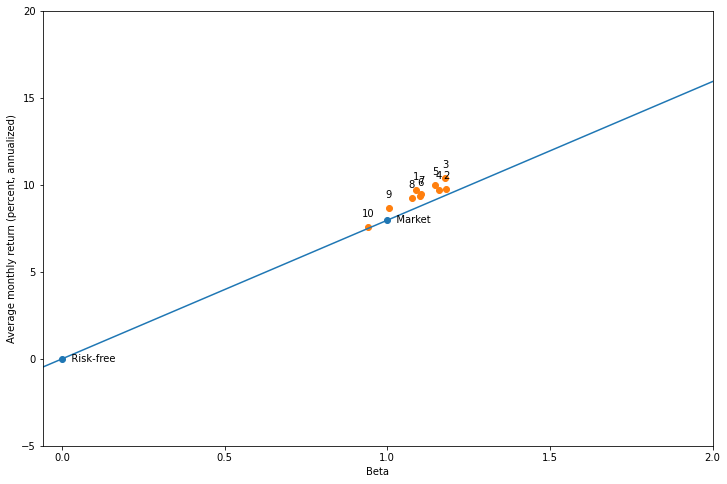

In [7]:
size_portfolios_figure_since_1950

## Portfolios formed on value, 1950-2023

In [8]:
%%capture
value_portfolios_excess_1950 = { key: portfolio['1950':] for key,portfolio in value_portfolios_excess.items() }
value_portfolios_figure_since_1950 = standard_figure(value_portfolios_excess_1950,'value_portfolios_1950')

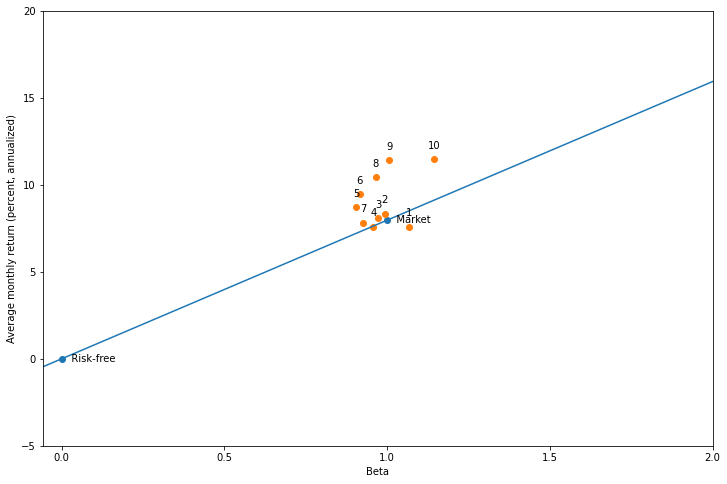

In [9]:
value_portfolios_figure_since_1950

## Notes on the figures using 1950–2023
During this shorter time period, returns to value-sorted portfolios did not follow the CAPM.

This suggests opportunities that one could have exploited.

Specifically: Value stocks (those with high BM ratios)
offered higher return, with similar beta, to growth stocks.
(Compare portfolios #8, 9, 10 with #1, 2, 3.)

This basic pattern is called the value premium.

Next: Similar conclusion for portfolios sorted on momentum.

## Portfolios formed on momentum, 1926-2023

In [10]:
%%capture

# Download Ken French's historical data on 10 portfolios formed on recent price increases ("momentum")
try: os.remove('10_Portfolios_Prior_12_2_CSV.zip')
except OSError: pass
try: os.remove('10_Portfolios_Prior_12_2.CSV')
except OSError: pass
wget.download('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/10_Portfolios_Prior_12_2_CSV.zip','10_Portfolios_Prior_12_2_CSV.zip')
shutil.unpack_archive('10_Portfolios_Prior_12_2_CSV.zip')

# Read the data from the CSV file
momentum_portfolios = pd.read_csv('10_Portfolios_Prior_12_2.CSV',skiprows=10,nrows=1169)
momentum_portfolios.columns = ['dateff','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10']
momentum_portfolios['month'] = pd.to_datetime(momentum_portfolios['dateff'],format="%Y%m",exact=True).dt.to_period('M')
momentum_portfolios = momentum_portfolios[['month','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10']].set_index('month')
momentum_portfolios = momentum_portfolios/100
momentum_portfolios = momentum_portfolios.loc['1926':'2023']

# Calculate average excess returns and betas, and build the figure
momentum_portfolios_excess = {"d"+str(i): momentum_portfolios["d"+str(i)] - FF3F['rf'] for i in range(1,11)}
momentum_portfolios_excess['mktrf'] = FF3F['mktrf']
momentum_portfolios_figure = standard_figure(momentum_portfolios_excess,'momentum_portfolios')

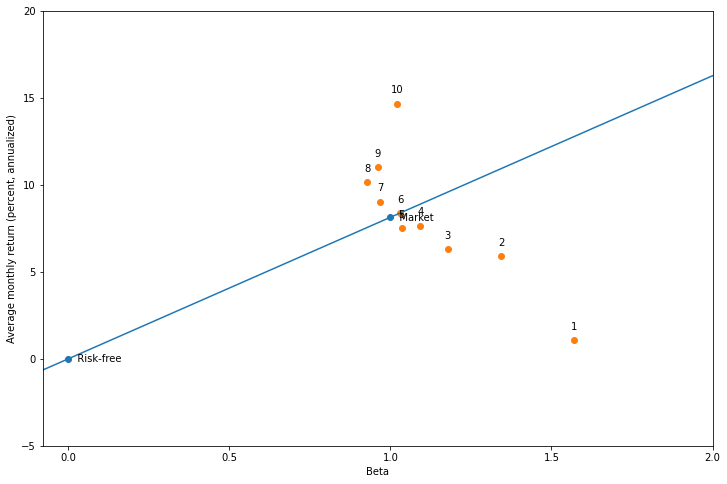

In [11]:
momentum_portfolios_figure

## Portfolios formed on momentum, 1950-2023

In [12]:
%%capture
momentum_portfolios_excess_1950 = { key: portfolio['1950':] for key,portfolio in momentum_portfolios_excess.items() }
momentum_figure_since_1950 = standard_figure(momentum_portfolios_excess_1950,'momentum_portfolios_1950')

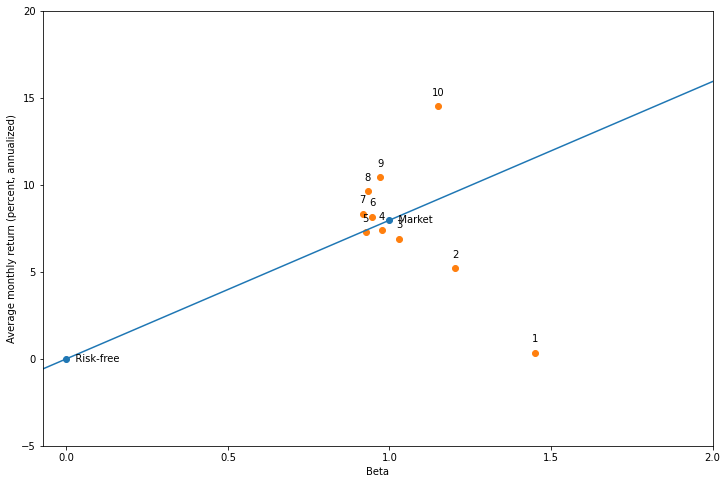

In [13]:
momentum_figure_since_1950

## Notes on value and momentum premiums

By sorting stocks on value and momentum, you could have
found portfolios in the past, that would have offered higher
returns without taking on more market risk (beta).

In academic literature, these style-based return are called factors.
I will use this term going forward.

In response to this evidence, the factor investing industry has
grown to meet investor demand for value- and
momentum-focused strategies, and to find new factors.

## Critical questions to ask about factor-based strategies

- What kind of risk do these strategies require you to bear?
    - The figures just showed average returns and betas.
    - This does not mean you can earn steady, reliable returns.
    - In fact, to earn the averages reported in the prior figures, you had to endure many times of very poor returns.
    
- How feasible is it to implement these strategies?
    - In the past, how close could you have come to actually achieving the returns in the prior figures?
    - In the future, how reliably can you do what the strategies describe, and how expensive will that be?

## Next step: Better ways to track factor returns

A first step is just to have a better way to track factor performance.

- So far we’ve been focused on simple graphs of average return
against beta. But these only give us a limited perspective on the
performance of an investmen strategy.

- The biggest limitation is that these graphs just show average
performance over a long horizon. They don’t tell us how much
short-term fluctuation the strategy might exhibit relative the
long-run average.

- In Module 3, we will build indexes of investment performance
that address this issue. The basic idea will be to study the
spreads between the returns of different portfolios.

## Many strategies just repackage well-known factors

Many popular investment strategies are tightly connected to
well-known factor strategies like size, value, or momentum.

- An EW index tilts heavily towards small and value stocks.
- Stocks that get added to an index are momentum stocks.

If you know this, you have a better perspective on what is really
“new,” and what is not, when you evaluate a new strategy.

- Don’t overpay for something that is already easily available!
- Again, Module 3 will explore this issue in detail.